# Lab 3 - Analisis Geoespacial

# Carga de archivos Tiff de bandas B04 y B08 de las dos fehas distintas

In [12]:
# ---------- 1. Archivos ----------
red_2020 = '2020-B04.tiff'
nir_2020 = '2020-B08.tiff'
red_2024 = '2024-B04.tiff'
nir_2024 = '2024-B08.tiff'

# Recorte del bbox y carga a rasterio

In [20]:
# ---------- 2. Recorte ----------
bbox = (-91.0, 16.0, -89.0, 18.0)   # Petén aprox.

with rasterio.open(red_2020) as src:
    win = from_bounds(*bbox, transform=src.transform)
    red20 = src.read(1, window=win).astype('float32')
    profile = src.profile
    profile.update({
        'height': win.height,
        'width':  win.width,
        'transform': src.window_transform(win)
    })

with rasterio.open(nir_2020) as src:
    nir20 = src.read(1, window=win).astype('float32')

with rasterio.open(red_2024) as src:
    red24 = src.read(1, window=win).astype('float32')

with rasterio.open(nir_2024) as src:
    nir24 = src.read(1, window=win).astype('float32')


# Calculo de NDVI

In [15]:
# ---------- 3. NDVI ----------
ndvi20 = (nir20 - red20) / (nir20 + red20)
ndvi24 = (nir24 - red24) / (nir24 + red24)

# ---------- 4. Diferencia y umbral ----------
delta = ndvi24 - ndvi20
forest_loss = delta < -0.2


/tmp/ipython-input-1627154842.py:2: RuntimeWarning: invalid value encountered in divide
  ndvi20 = (nir20 - red20) / (nir20 + red20)
/tmp/ipython-input-1627154842.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi24 = (nir24 - red24) / (nir24 + red24)


# Calculo porcentual de area deforestada

In [17]:
# ---------- 5. Área deforestada ----------
pixel_area = abs(profile['transform'][0] * profile['transform'][4])  # m²
total_pixels = red20.size
loss_pixels = np.sum(forest_loss)
percent_loss = (loss_pixels / total_pixels) * 100
print(f"Área deforestada: {percent_loss:.2f} % del área analizada")

Área deforestada: 3.90 % del área analizada


# Visualizacion de los mapas

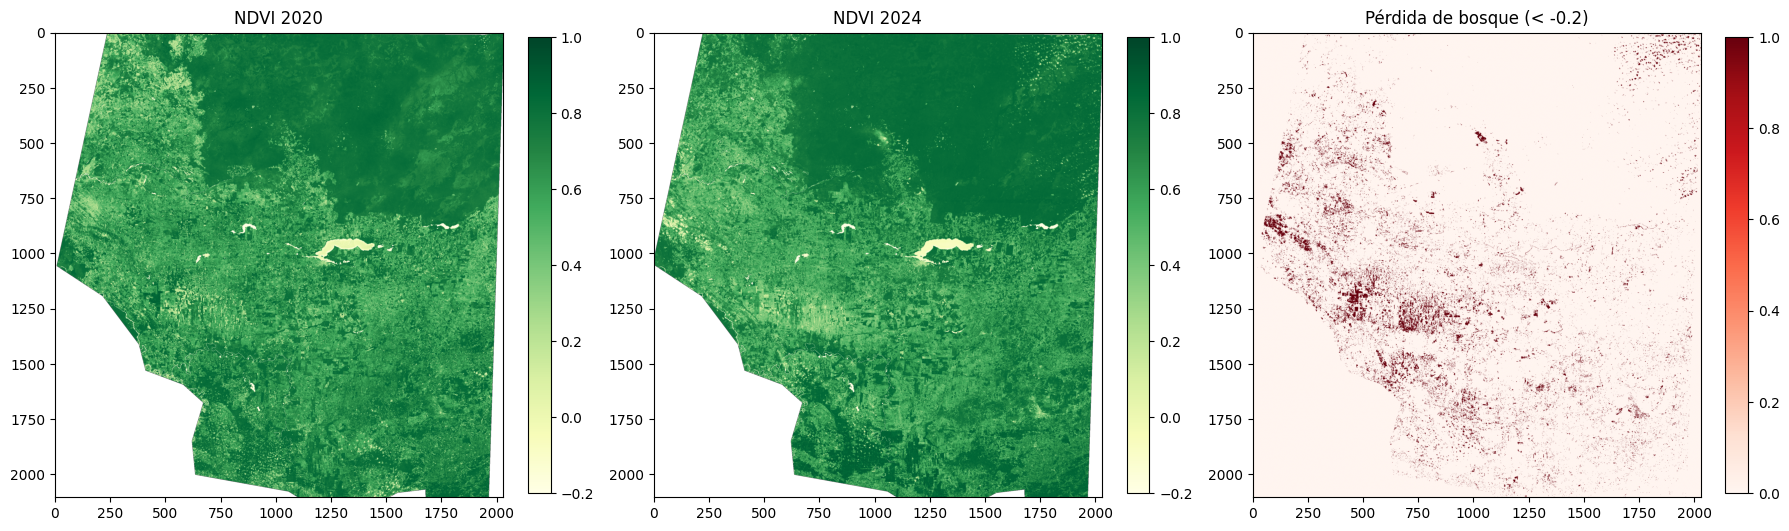

In [16]:
# ---------- 6. Visualización ----------
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
im0 = ax[0].imshow(ndvi20, cmap='YlGn', vmin=-0.2, vmax=1)
ax[0].set_title('NDVI 2020')
plt.colorbar(im0, ax=ax[0], fraction=0.046)

im1 = ax[1].imshow(ndvi24, cmap='YlGn', vmin=-0.2, vmax=1)
ax[1].set_title('NDVI 2024')
plt.colorbar(im1, ax=ax[1], fraction=0.046)

im2 = ax[2].imshow(forest_loss, cmap='Reds')
ax[2].set_title('Pérdida de bosque (< -0.2)')
plt.colorbar(im2, ax=ax[2], fraction=0.046)

plt.tight_layout()
plt.show()